# 데이터 셋 나누기 

## 훈련데이터와 테스트 데이터 분류

- 결과의 일반화 성능비교를 위해 훈련데이터와 테스트데이터로 구분하는 것은 머신러닝/딥러닝의 기본적인 과정임

- 훈련데이터를 여러 개로 나눌 것인가(교차검증), 훈련/테스트 데이터 외에 별도의 검증데이터로 더 일반화 가능성을 탐색할 것인가 세분화됨



> * 교차검증이 필요한 이유

데이터는 label이 있는 train, test set으로 구성되어 있다. 

만약 'train set을 다시 train set + validation set으로 분리하지 않는다'라고 가정하면, 우리는 모델 검증을 위해서 test set을 사용하여야 할 것이다. 사실상 test set이 아닌 valdiation set인 셈인데, 여기에 한 가지 약점이 존재한다. 고정된 test set을 가지고 모델의 성능을 확인하고 파라미터를 수정하고, 이 과정을 반복하면 결국 내가 만든 모델은 test set에만 잘 동작하는 모델이 된다. 이 경우에는 test set에 과적합(overfitting)되어 다른 실제 데이터를 가지고 예측을 수행하면 엉망인 결과가 나와버리게 된다.

이렇듯 고정된 train set과 test set으로 평가를 하고, 반복적으로 모델을 튜닝하다보면 test set에만 과적합되어버리는 결과가 생긴다. 이를 해결하고자 하는 것이 바로 교차 검증(cross validation)이다.

그렇다면 교차 검증은 어떻게 이 문제를 해결할까?

'test set에 과적합 되는 문제'는 test set이 데이터 중 일부분으로 고정되어 있고, 이 일부분의 데이터 셋에 대하여 성능이 잘 나오도록 파라미터를 반복적으로 튜닝하기 때문에 발생한다. 교차 검증은 데이터의 모든 부분을 사용하여 모델을 검증하고, test set을 하나로 고정하지 않는다. 

> 훈련데이터를 아래 그림과 같이 나눈다.

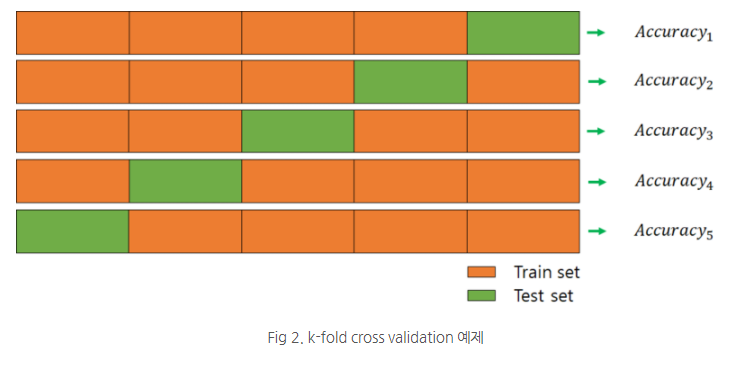

# 실습

## 1. 데이터 불러오기


> min-max scaling 으로 데이터 변경해준 csv 파일 불러오기

- 데이터스케일링과 범주특성의 변환 전 페이지 참고해주세요~!

In [1]:

data<-read.csv("Fvote.csv", header=TRUE)
data<-data[ , 2:15]

In [2]:
data

gender.male,gender.female,region.Sudo,region.Chungcheung,region.Honam,region.Youngnam,region.Others,edu,income,age,score_gov,score_progress,score_intention,vote
1,0,0,0,0,1,0,1.0,0.6666667,0.6666667,0.25,0.25,0.75,1
1,0,0,0,0,0,1,0.5,0.6666667,0.6666667,0.25,0.75,0.50,0
1,0,0,0,1,0,0,0.0,0.3333333,1.0000000,0.00,0.50,0.45,1
0,1,1,0,0,0,0,0.5,0.0000000,0.6666667,1.00,0.75,0.40,1
1,0,1,0,0,0,0,0.0,0.3333333,1.0000000,0.75,0.50,0.35,1
1,0,1,0,0,0,0,0.0,0.3333333,1.0000000,0.00,0.75,0.70,1
1,0,1,0,0,0,0,0.0,0.3333333,1.0000000,0.75,0.75,0.25,1
1,0,0,0,0,0,1,0.5,1.0000000,1.0000000,0.50,0.75,0.65,1
1,0,0,1,0,0,0,0.0,0.3333333,1.0000000,0.25,0.25,0.25,0
1,0,1,0,0,0,0,0.0,0.3333333,0.6666667,0.75,0.25,0.50,1


In [3]:
data$vote<-factor(data$vote, labels=c("no", "yes"))

In [4]:
head(data)


gender.male,gender.female,region.Sudo,region.Chungcheung,region.Honam,region.Youngnam,region.Others,edu,income,age,score_gov,score_progress,score_intention,vote
1,0,0,0,0,1,0,1.0,0.6666667,0.6666667,0.25,0.25,0.75,yes
1,0,0,0,0,0,1,0.5,0.6666667,0.6666667,0.25,0.75,0.50,no
1,0,0,0,1,0,0,0.0,0.3333333,1.0000000,0.00,0.50,0.45,yes
0,1,1,0,0,0,0,0.5,0.0000000,0.6666667,1.00,0.75,0.40,yes
1,0,1,0,0,0,0,0.0,0.3333333,1.0000000,0.75,0.50,0.35,yes
1,0,1,0,0,0,0,0.0,0.3333333,1.0000000,0.00,0.75,0.70,yes


## 2. train / test dataset 나누기


In [5]:

library(caret)
library(dplyr)


Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [6]:
set.seed(42)
training.samples <- createDataPartition(data$vote, p = 0.7, list = FALSE)
training.samples

Resample1
1
2
3
4
5
6
7
11
12
15


In [7]:
train  <- data[training.samples, ]
test <- data[-training.samples, ]

## 3. train / test 모델 적용

### 3-1. 모델 적용

In [8]:
library(class)
y_train_pred=knn(train, train, train$vote, k=3)
y_test_pred=knn(train, test, train$vote, k=3)

Warning message in knn(train, train, train$vote, k = 3):
"강제형변환에 의해 생성된 NA 입니다"Warning message in knn(train, train, train$vote, k = 3):
"강제형변환에 의해 생성된 NA 입니다"

ERROR: Error in knn(train, train, train$vote, k = 3): 외부 함수 호출시 NA/NaN/Inf가 있습니다 (인자 6)


> knn 오류나는이유 - vote 컬럼 데이터가 factor 되있기 때문이다.

> factor 코딩만 제외하고 위에서 처음부터 다시 실행해주기 

In [9]:

data<-read.csv("Fvote.csv", header=TRUE)
data<-data[ , 2:15]

In [10]:
set.seed(42)

In [11]:

training.samples <- createDataPartition(data$vote, p = 0.7, list = FALSE)
training.samples

Resample1
1
2
3
4
5
6
9
12
13
14


In [12]:
train  <- data[training.samples, ]
test <- data[-training.samples, ]

In [13]:
library(class)

In [14]:
y_train_pred=knn(train, train, train$vote, k=3)
y_test_pred=knn(train, test, train$vote, k=3)

## 모델 평가

###  훈련데이터의 평가


In [15]:
y_train_real = train$vote
y_test_real = test$vote
train_table = table(y_train_real, y_train_pred)
print(paste("훈련데이터의 혼동행렬"))
print(train_table)
y_train_accuracy=(train_table[1,1]+train_table[2,2])/sum(train_table,4)
print(paste("훈련데이터의 정확도:", y_train_accuracy))


[1] "훈련데이터의 혼동행렬"
            y_train_pred
y_train_real   0   1
           0  44   1
           1   0 103
[1] "훈련데이터의 정확도: 0.967105263157895"


### 테스트데이터의 평가

In [16]:

test_table = table(y_test_real, y_test_pred)
print(paste("테스트데이터의 혼동행렬"))
print(test_table)
y_test_accuracy=(test_table[1,1]+test_table[2,2])/sum(test_table,4)
print(paste("테스트데이터의 정확도:", y_test_accuracy))

[1] "테스트데이터의 혼동행렬"
           y_test_pred
y_test_real  0  1
          0 14  2
          1  0 47
[1] "테스트데이터의 정확도: 0.91044776119403"


# 반복없는 K-fold cross-validation

##  train control 설정

In [17]:

set.seed(42) 
train.control <- trainControl(method = "cv", number = 5)
# cv(교차 검증), repeatedcv(교차 검증의 반복), LOOCV(Leave One Out Cross Validation)

## 모델 훈련 적용


In [18]:
install.packages("e1071")
library(e1071)
# vote 종속변수를 빼고 모두 컬럼데이터를 독립변수로 설정함
model <- train(vote ~., data = train, method = "knn", trControl = train.control)
model


  There is a binary version available but the source version is later:
      binary source needs_compilation
e1071  1.7-6  1.7-9              TRUE

  Binaries will be installed
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MyCom\AppData\Local\Temp\RtmpUTz1yG\downloaded_packages


Warning message:
"package 'e1071' was built under R version 3.6.3"Warning message in train.default(x, y, weights = w, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column."

k-Nearest Neighbors 

148 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 118, 119, 118, 119, 118 
Resampling results across tuning parameters:

  k  RMSE       Rsquared     MAE      
  5  0.5157014  0.003231047  0.4392261
  7  0.5036017  0.008318312  0.4356034
  9  0.4753800  0.018918151  0.4157701

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 9.

> RMSE 대신  Accuracy가 나와야 한다. 해결방안 -> vote 컬럼데이터를 factor 해줘야함

In [19]:
data$vote<-factor(data$vote, labels=c("no", "yes"))

In [20]:
set.seed(42)

In [21]:

training.samples <- createDataPartition(data$vote, p = 0.7, list = FALSE)


In [22]:
train  <- data[training.samples, ]
test <- data[-training.samples, ]

In [23]:

set.seed(42) 
train.control <- trainControl(method = "cv", number = 3)
# cv(교차 검증), repeatedcv(교차 검증의 반복), LOOCV(Leave One Out Cross Validation)

In [24]:
model <- train(vote ~., data = train, method = "knn", trControl = train.control)
model

k-Nearest Neighbors 

148 samples
 13 predictor
  2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 99, 99, 98 
Resampling results across tuning parameters:

  k  Accuracy   Kappa     
  5  0.6282993  0.05194936
  7  0.6619048  0.10466503
  9  0.6959184  0.15192018

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

>  k = 9 일때 가장 좋은 정확도를 보였다.

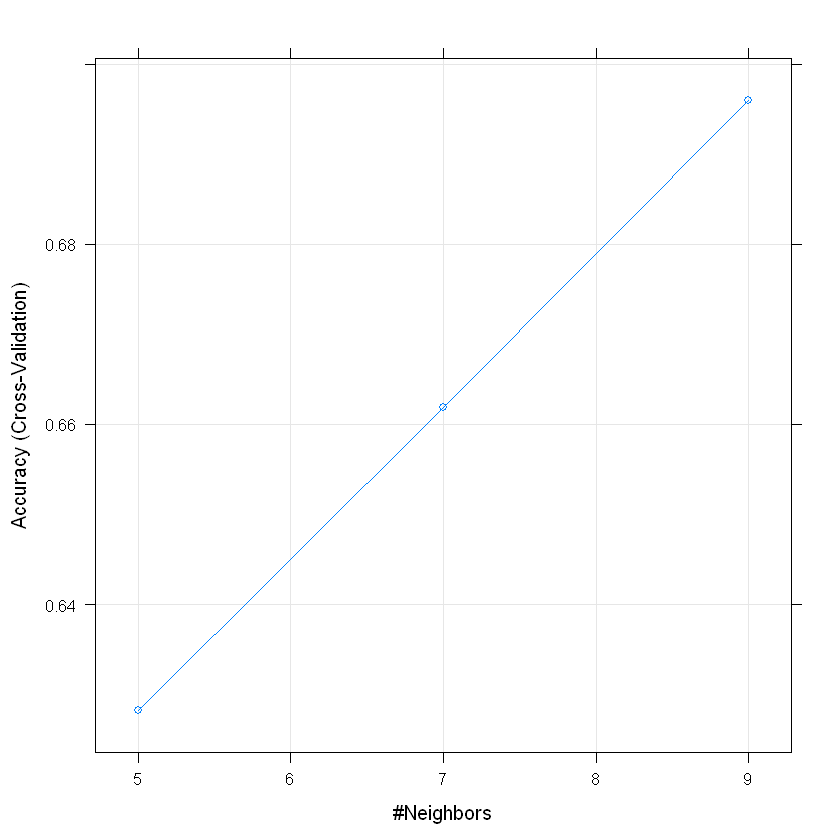

In [25]:
plot(model)


## 훈련데이터 결과


In [26]:
print(model)


k-Nearest Neighbors 

148 samples
 13 predictor
  2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 99, 99, 98 
Resampling results across tuning parameters:

  k  Accuracy   Kappa     
  5  0.6282993  0.05194936
  7  0.6619048  0.10466503
  9  0.6959184  0.15192018

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.


In [27]:
model$results

k,Accuracy,Kappa,AccuracySD,KappaSD
5,0.6282993,0.05194936,0.01438064,0.05968801
7,0.6619048,0.10466503,0.04500605,0.12427896
9,0.6959184,0.15192018,0.06132645,0.17096659


In [28]:

model$bestTune      
 

,k
3,9


###  훈련데이터셋 평가



In [29]:
pred_train <- predict(model, train)
train_table = table(y_train_real, pred_train)
train_table
train_accuracy=(train_table[1,1]+train_table[2,2])/sum(train_table)
print(paste("훈련데이터의 정확도:", train_accuracy))

            pred_train
y_train_real no yes
           0  7  38
           1 18  85

[1] "훈련데이터의 정확도: 0.621621621621622"


### 테스트데이터셋 평가


In [30]:
# 4-5. 테스트데이터셋 평가
pred_test <- predict(model, test)
test_table = table(y_test_real, pred_test)
test_table
test_accuracy=(test_table[1,1]+test_table[2,2])/sum(test_table)
print(paste("테스트데이터의 정확도:", test_accuracy))

           pred_test
y_test_real no yes
          0  2  14
          1  6  41

[1] "테스트데이터의 정확도: 0.682539682539683"


# 반복있는 K-fold cross-validation

## 1. train control 설정

In [31]:
set.seed(42) 
train.control <- trainControl(method = "repeatedcv", number = 3, repeats = 10)


In [32]:
model <- train(vote ~., data = train, method = "knn", trControl = train.control)
model

k-Nearest Neighbors 

148 samples
 13 predictor
  2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (3 fold, repeated 10 times) 
Summary of sample sizes: 99, 99, 98, 99, 99, 98, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.6574150  0.1171199
  7  0.6710476  0.1155950
  9  0.6886395  0.1165854

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

In [33]:
pred_train <-predict(model,train)

In [34]:
pred_train

[1] yes yes yes yes yes yes yes yes no  yes yes yes yes yes yes yes no  yes
 [19] yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes no  yes
 [37] yes yes no  yes yes yes yes yes no  no  yes yes yes yes yes yes yes yes
 [55] yes yes yes yes yes yes yes yes no  yes yes yes yes yes yes yes yes no 
 [73] yes yes yes no  no  no  yes yes yes yes yes yes yes yes yes yes no  yes
 [91] no  yes yes yes yes yes yes no  yes yes yes no  yes yes yes no  yes yes
[109] yes yes no  yes yes yes yes yes yes yes yes no  yes yes yes yes yes yes
[127] no  yes yes yes no  yes no  yes no  yes yes yes no  yes yes yes no  yes
[145] no  yes yes yes
Levels: no yes

In [35]:
table_train=table(y_train_real,pred_train)

In [36]:
table_train

            pred_train
y_train_real no yes
           0  8  37
           1 17  86

In [37]:
train_accuracy=(table_train[1,1]+table_train[2,2])/sum(table_train)
print(paste("훈련데이터의 정확도:", train_accuracy))

[1] "훈련데이터의 정확도: 0.635135135135135"


In [38]:
pred_test<-predict(model,test)

In [39]:
pred_test

[1] yes yes yes no  yes yes yes yes yes yes yes yes yes yes no  yes yes yes yes
[20] yes yes yes yes yes no  yes yes yes yes yes yes yes no  yes yes yes yes yes
[39] yes yes yes yes yes yes yes yes yes yes yes no  yes yes yes yes yes no  no 
[58] yes yes yes yes yes no 
Levels: no yes

In [40]:
test_table = table(y_test_real, pred_test)
test_table
test_accuracy=(test_table[1,1]+test_table[2,2])/sum(test_table)
print(paste("테스트데이터의 정확도:", test_accuracy))

           pred_test
y_test_real no yes
          0  3  13
          1  5  42

[1] "테스트데이터의 정확도: 0.714285714285714"


> 훈련데이터 정확도와 테스트데이터 정확도에서 반복있는 K-fold cross-validation가
K-fold cross-validation보다 더 정확도가 좋아 반복있는 K-fold cross-validation를 더 많이 사용한다.